# Determining the Market Price of A House 

Description: This project is to determining the market price of a house given a set of features. We will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. This dataset contains house sale prices for a random County in the United State. It includes homes sold between May 2014 and May 2015. 

Objects: 

- 1: Importing Data
- 2: Data Wrangling
- 3: Exploratory Data Analysis
- 4: Model Development
- 5: Model Evaluation and Refinement

#### Step 1: Importing Data

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [47]:
df = pd.read_csv("house_data_sample.csv")
print(df.head())

   Unnamed: 0          id             date   price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900       3.0       1.00   
1           1  6414100192  20141209T000000  538000       3.0       2.25   
2           2  5631500400  20150225T000000  180000       2.0       1.00   
3           3  2487200875  20141209T000000  604000       4.0       3.00   
4           4  1954400510  20150218T000000  510000       3.0       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  sqft_above  sqft_basement  \
0         1180      5650     1.0           0  ...        1180              0   
1         2570      7242     2.0           0  ...        2170            400   
2          770     10000     1.0           0  ...         770              0   
3         1960      5000     1.0           0  ...        1050            910   
4         1680      8080     1.0           0  ...        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15 

First , let us diplay the data types and obtain a statistical summany of the dataframe


In [48]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price              int64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
swimming_pool     object
dtype: object


In [49]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Step 2: Data Wrangling

In the data wrangling step, we will drop some columns like "id" and "Unamed: 0", also find the missing values and replace with mean/average or max frequency of showings. 

In [50]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [51]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())
    print(" ")

date
False    21613
Name: count, dtype: int64
 
price
False    21613
Name: count, dtype: int64
 
bedrooms
False    21600
True        13
Name: count, dtype: int64
 
bathrooms
False    21603
True        10
Name: count, dtype: int64
 
sqft_living
False    21613
Name: count, dtype: int64
 
sqft_lot
False    21613
Name: count, dtype: int64
 
floors
False    21613
Name: count, dtype: int64
 
waterfront
False    21613
Name: count, dtype: int64
 
view
False    21613
Name: count, dtype: int64
 
condition
False    21613
Name: count, dtype: int64
 
grade
False    21613
Name: count, dtype: int64
 
sqft_above
False    21613
Name: count, dtype: int64
 
sqft_basement
False    21613
Name: count, dtype: int64
 
yr_built
False    21613
Name: count, dtype: int64
 
yr_renovated
False    21613
Name: count, dtype: int64
 
zipcode
False    21613
Name: count, dtype: int64
 
lat
False    21613
Name: count, dtype: int64
 
long
False    21613
Name: count, dtype: int64
 
sqft_living15
False    21613
Name: count, 

Now we can replace the missing values of the column 'bedrooms' and "bathrooms" with the mean of the column 'bedrooms' and 'nathrooms'


In [52]:
mean_bed =df['bedrooms'].mean()
df['bedrooms'] = df['bedrooms'].fillna(mean_bed)

mean_bath =df['bathrooms'].mean()
df['bathrooms'] = df['bathrooms'].fillna(mean_bath)

print ("Number of NaN values for bedrooms: ", df['bedrooms'].isnull().sum())
print ("Number of NaN values for bathrooms: ", df['bathrooms'].isnull().sum())

Number of NaN values for bedrooms:  0
Number of NaN values for bathrooms:  0


For the last particular column, instead of mean, we will replace with the most common type (Y/N)

In [53]:
df['swimming_pool'].value_counts()

swimming_pool
No     20231
Yes     1375
Name: count, dtype: int64

As we see above, most of the house doesn't have a swimming pool, therefore we will replace the umpty/NaN value with No. 

In [54]:
df['swimming_pool'] = df['swimming_pool'].fillna("No")
print ("Number of NaN values for swimming pools: ", df['swimming_pool'].isnull().sum())

Number of NaN values for swimming pools:  0


Next, we will transfer values of several variables into a similar range (0 to 1) - Data Normalization

In [55]:
# replace original value by (original value)/(maximum value)
df['sqft_above'] = df['sqft_above']/df['sqft_above'].max()
df['sqft_living'] = df['sqft_living']/df['sqft_living'].max()
df['sqft_lot'] = df['sqft_lot']/df['sqft_lot'].max()
df['sqft_basement'] = df['sqft_basement']/df['sqft_basement'].max()
df['sqft_living15'] = df['sqft_living15']/df['sqft_living15'].max()
df['sqft_lot15'] = df['sqft_lot15']/df['sqft_lot15'].max()


df[['sqft_above', 'sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_living15', 'sqft_lot15'  ]].head()

,sqft_above,sqft_living,sqft_lot,sqft_basement,sqft_living15,sqft_lot15
0,0.125399,0.087149,0.003421,0.000000,0.215781,0.006485
1,0.230606,0.189808,0.004385,0.082988,0.272142,0.008768
2,0.081828,0.056869,0.006056,0.000000,0.438003,0.009254
3,0.111583,0.144756,0.003028,0.188797,0.219002,0.005739
4,0.178533,0.124077,0.004893,0.000000,0.289855,0.008612


Last but not least, we will use indicator cariables so we can use categotical variables for regression analysis later as needed. The column "swimming_pool" has two unique values: "Yes" or "No". Regression doesn't understnad words, only numbers. To use this attribute in regression analysis, we can convert "swimming_pool" to indicator variables.

In [56]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'swimming_pool'],
      dtype='object')

In [ ]:
dummy_variable_1 = pd.get_dummies(df["swimming_pool"])

dummy_variable_1.rename(columns={"No":  "swimming_pool_no", "Yes": "swimming_pool_yes"}, inplace=True)
dummy_variable_1 = dummy_variable_1.astype(int)

# Merge the dummies back into the main DataFrame
df = pd.concat([df, dummy_variable_1], axis=1)
# Drop the original categorical column
df.drop(columns=["swimming_pool"], inplace=True)

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,swimming_pool_no,swimming_pool_yes
0,20141013T000000,221900,3.0,1.00,0.087149,0.003421,1.0,0,0,3,...,0.000000,1955,0,98178,47.5112,-122.257,0.215781,0.006485,1,0
1,20141209T000000,538000,3.0,2.25,0.189808,0.004385,2.0,0,0,3,...,0.082988,1951,1991,98125,47.7210,-122.319,0.272142,0.008768,1,0
2,20150225T000000,180000,2.0,1.00,0.056869,0.006056,1.0,0,0,3,...,0.000000,1933,0,98028,47.7379,-122.233,0.438003,0.009254,1,0
3,20141209T000000,604000,4.0,3.00,0.144756,0.003028,1.0,0,0,5,...,0.188797,1965,0,98136,47.5208,-122.393,0.219002,0.005739,1,0
4,20150218T000000,510000,3.0,2.00,0.124077,0.004893,1.0,0,0,3,...,0.000000,1987,0,98074,47.6168,-122.045,0.289855,0.008612,1,0


Now we have the cleaned dataset ready!

#### Step 3: Exploratory Data Anlysis (EDA)

Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers. As we see below, having a waterfront view is strongly associated with higer and more variable sale prices. This suggests "waterfront" os a powerful predictor if we are modeling house price. 

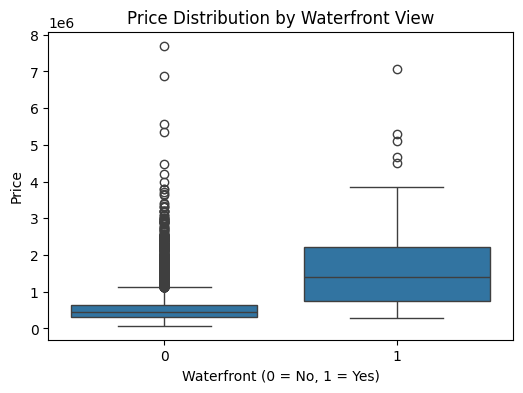

In [61]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='waterfront', y='price', data=df)

plt.title('Price Distribution by Waterfront View')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price')

plt.show()

Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

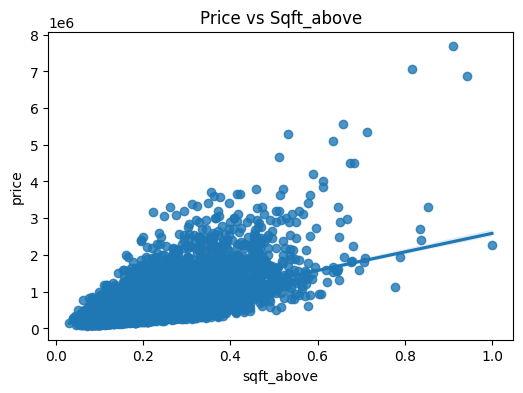

In [62]:
plt.figure(figsize=(6, 4))

sns.regplot(x='sqft_above', y='price', data=df)

plt.title('Price vs Sqft_above')
plt.xlabel('sqft_above')
plt.ylabel('price')

plt.show()

Now let us check all features other than price that is most correlated with price.

In [64]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['price'].sort_values()

zipcode             -0.053203
swimming_pool_no    -0.027536
long                 0.021626
swimming_pool_yes    0.027536
condition            0.036362
yr_built             0.054012
sqft_lot15           0.082447
sqft_lot             0.089661
yr_renovated         0.126434
floors               0.256794
waterfront           0.266369
lat                  0.307003
bedrooms             0.308797
sqft_basement        0.323816
view                 0.397293
bathrooms            0.525738
sqft_living15        0.585379
sqft_above           0.605567
grade                0.667434
sqft_living          0.702035
price                1.000000
Name: price, dtype: float64

#### Step 4: Model Development

Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2.

In [65]:
X= df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

0.4928532179037931

Fit a linear regression model to predict the 'price' using the list of features: ["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"] 

In [66]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]  

X = df[features]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

0.6576951666037503

A raw R^2 of 0.6576 tells us the chosen features have strong explanatory power, but we want to validate that on held‐out data and consider whether our model form is really capturing all the structure. Next, we will use the inout below, then give our regression model extra polunimial and interaction terms, and finally measuring how well that enhanced linear model explains the vatiance in price on our dataset. 

In [67]:
Input = [
    ('scale',      StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model',      LinearRegression())
]

pipe = Pipeline(Input)
pipe.fit(X, Y)
pipe.score(X, Y)

0.7513408515988734

For next step, we need to identity if the model is overfitting. 

#### Step 5: Model Evaluation and Refinement

We switch to a train/test split and then fit a Ridge model on the training to evaluate any model on unseen data: to get an honest estimate of how it will generalize, and to combat over‐fitting. Here’s the step‐by‐step rationale

Next we will split the data into training and testing sets

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("Number of test samples: ", x_test.shape[0])
print("Number of training samples: ", x_train.shape[0])

Number of test samples:  3242
Number of training samples:  18371


Ridge to penalize complexity and reduce over-fitting, especially helpful once you’ve blown up your feature space with polynomials or have collinear predictors. Now we will create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. 

In [75]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

ridge.score(x_test, y_test)

0.6478978706567338

Then le us perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided

In [76]:
poly = PolynomialFeatures(degree=2, include_bias=False)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(x_train_poly, y_train)

ridge_poly.score(x_test_poly, y_test)

0.7027390768528179

That jump from 0.6479 (plain Ridge on raw features) to 0.7003 (Ridge on 2nd-order polynomials) tells us:

1. Polunomial terms really help generalization: Adding squared and interaction features captured real non-linear structure that our simple linear model was missing—so even out-of-sample.
2. Still some overfitting remains: Our in-sample R^2 was .075, but out-of-sample it;s 0.7003. That ~0.05 gap is the signature of a bit of overfitting: our model still has more flexibility than the data can fully support. However, regularization (α=0.1) has closed the gap substantially compared to an unpenalized polynomial fit.
3. What does it mean to our project:  0.7003 is a strong test R^2 for housing prices - we’ve captured most of the systematic variation with just 11 original features plus their quadratic/interaction terms. The fact that test R^2 is lower than the all-data R^2 is expacted; it's a more honest measure of how well our model predit new houses. 